In [68]:
import os
from pathlib import Path
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import astropy.units as u
from astropy.visualization import ImageNormalize
from astropy.coordinates import SkyCoord
import sunpy
import sunpy.map
from sunpy.coordinates import frames

In [4]:
datadir = Path(os.environ['DATA'], 'HMI', 'Polar_Faculae', '2021_03')
images = sorted(datadir.glob('*.fits'))
outputdir = Path(datadir, 'balltracking',
                 'gamma0.75_noise1.03_thresh1.04_tdxy0.1_z1.7_intsteps80')

# Load ballpos array from ballpos.npz

ballpos = np.load(Path(outputdir, 'ballpos.npz'))['ballpos']
ballpos.shape, len(images)

((3, 648, 10), 627)

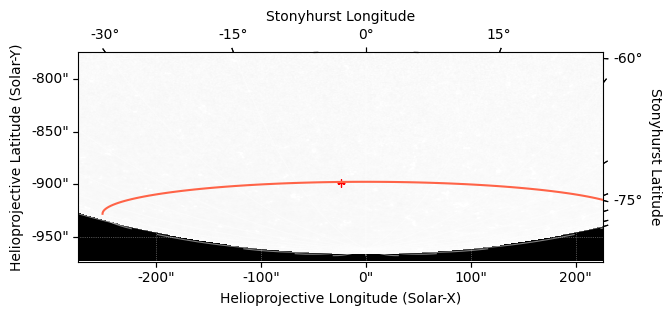

In [66]:
plt.close('all')
hmimap = sunpy.map.Map(images[0])

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(projection=hmimap)
image = hmimap.plot(axes=ax, clip_interval=(1, 99.9)*u.percent)
ax.set_title('')
ax.set_xlim(1500, 2500)
ax.set_ylim(100, 500)
ax.plot(2000, 250, 'r+')

stonyhurst_grid= hmi_submap.draw_grid(axes=ax, system='stonyhurst')


# ax.grid(False)
# for coord in [0, 1]:
#     ax.coords[coord].set_ticklabel_visible(False)
#     ax.coords[coord].set_ticks_visible(False)

# stonyhurst_grid['lon'].set_ticks([-60, -70, -80] * u.deg)

stonyhurst_frame = frames.HeliographicStonyhurst(obstime=hmimap.date)
num_points = 100
lat_value = -75 * u.deg
constant_lat = SkyCoord(np.linspace(-90, 90, num_points) * u.deg, lat_value,
                        frame=stonyhurst_frame)
ax.plot_coord(constant_lat, color="tomato")
# # Make some room and put the title at the top of the figure
ax.set_position([0.1, 0.1, 0.8, 0.7])
ax.set_title(ax.get_title(), pad=45)
plt.show()

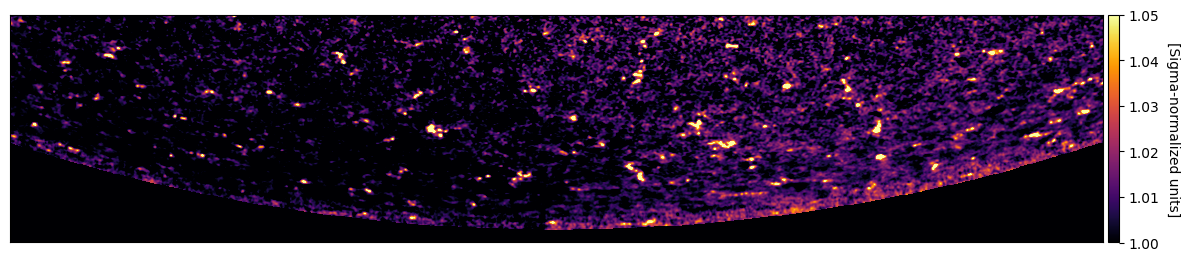

In [5]:
matplotlib.rcParams.update({'font.size': 10})

int_im = fits.getdata(images[0])
vmin = 1.00 
vmax = 1.05
# Preview images and faculae masks
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,3))
im = axs.imshow(int_im, origin='lower', cmap='inferno', vmin=vmin, vmax=vmax)
axs.axis([2048-600, 2048+600, 100, 350])
# Turn off tick labels
axs.set_yticklabels([])
axs.set_xticklabels([])
axs.set_yticks([])
axs.set_xticks([])
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="1%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('[Sigma-normalized units]', rotation=270)


fig_path = Path(outputdir, 'figures', f'sample_image.png')
plt.tight_layout()
# plt.savefig(fig_path, dpi=180, transparent=True)


In [165]:
def plot_balls_over_frame(fitsfile, ballpos_n, ballvel=None, figsize=None, axlims=None, title=None, ms=4, **kwargs):

    hmimap = sunpy.map.Map(fitsfile)

    
    ballpos_x = ballpos_n[0, :]
    ballpos_y = ballpos_n[1, :]

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(projection=hmimap)
    image = hmimap.plot(axes=ax, norm=ImageNormalize(vmin=1, vmax=1.05), cmap='gray_r')


    # constant_lat1 = SkyCoord(np.linspace(-90, 90, num_points) * u.deg, -80* u.deg, frame=carrington_frame)
    # pole = SkyCoord(0 * u.deg, -90* u.deg, frame=stonyhurst_frame)
    # ax.plot_coord(constant_lat1, color="gray")
    # ax.text(-50, -79, '-80°', size=16, transform=ax.get_transform('heliographic_carrington'))

    # constant_lat2 = SkyCoord(np.linspace(-90, 90, num_points) * u.deg, -85* u.deg, frame=carrington_frame)
    # ax.plot_coord(constant_lat2, color="black")
    # ax.text(-50, -84, '-85°', size=16, transform=ax.get_transform('heliographic_carrington'))


    ax.plot_coord(pole, 'r+', ms=12, lw=12)
    

    # fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    # im = plt.imshow(frame, origin='lower', **kwargs)
    plt.plot(ballpos_x, ballpos_y, 'ro', markerfacecolor='None', ms=2*ms)
    nbadballs = np.count_nonzero(ballpos_x == -1)

    txt = plt.text(0.01, 0.9, title, transform=ax.transAxes, color='black')
    txt.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))

    ax.set_position([0.1, 0.1, 0.8, 0.7])
    ax.set_title(ax.get_title(), pad=45)
    
    if axlims is not None:
        plt.axis(axlims)
    plt.xlabel('X [arcsec]')
    plt.ylabel('Y [arcsec]')

    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    
    # divider = make_axes_locatable(ax)
    # cax = divider.append_axes("right", size="1%", pad=0.05)
    # cbar = plt.colorbar(im, cax=cax)
    # cbar.ax.get_yaxis().labelpad = 15
    # cbar.ax.set_ylabel('[Sigma-normalized units]', rotation=270)


    for b in range(ballpos_x.size):
        x = ballpos_x[b]
        y = ballpos_y[b]

        if x > 0 and y > 0:
            if ballvel is not None:
                vx = ballvel[0, b]
                if vx >= 0:
                    color = 'Blue'
                else:
                    color = 'Orange'

                ax.plot(x, y, marker='o', markeredgecolor=color, markerfacecolor='None', ms=2 * ms)
                ax.quiver(x, y, vx, 0,
                           color=color, angles='xy', scale_units='xy', scale=0.2,
                           width=0.004,
                           headwidth=2, headlength=2, headaxislength=2)

    plt.tight_layout()
    
    return ax

In [166]:
stonyhurst_frame = frames.HeliographicStonyhurst(obstime=hmimap.date)
carrington_frame = frames.HeliographicCarrington(obstime=hmimap.date, observer="earth")
num_points = 100

constant_lat1 = SkyCoord(np.linspace(-90, 90, num_points) * u.deg, -80* u.deg, frame=stonyhurst_frame)
pole = SkyCoord(0 * u.deg, -90* u.deg, frame=stonyhurst_frame)

constant_lat2 = SkyCoord(np.linspace(-90, 90, num_points) * u.deg, -85* u.deg, frame=stonyhurst_frame)


In [168]:
vmin = 1.00
vmax = 1.05


for n in range(10):

    ballpos_n = ballpos[:, :, n]
    
    ballvel = None
    if n > 0:
        ballvel = ballpos[:, :, n] - ballpos[:, :, n-1]
        
    fig_path = Path(outputdir, 'figures', f'frame_pos_{n:04d}.png')
    
    %matplotlib inline
    matplotlib.rcParams.update({'font.size': 10})
    
    plt.close('all')
    ax = plot_balls_over_frame(images[n], ballpos_n, ballvel=ballvel,
                          figsize=(12, 3), cmap='gray_r', axlims=[2048-600, 2048+600, 100, 350], title=f'Frame # {n}', vmin=vmin, vmax=vmax)

    ax.plot_coord(constant_lat1, color="gray")
    ax.text(-50, -79, '-80°', size=16, transform=ax.get_transform('heliographic_stonyhurst'))
    ax.plot_coord(constant_lat2, color="black")
    ax.text(-50, -84, '-85°', size=16, transform=ax.get_transform('heliographic_stonyhurst'))

    plt.savefig(fig_path, dpi=180)
    plt.close()

    

In [7]:
list(range(2))

[0, 1]